### 问题二 斯坦麦茨方程（Steinmetz-equation）修正
#### 在传统磁芯损耗模型中，斯坦麦茨方程（Steinmetz-equation）（公式（2））虽作为经典模型被广泛应用，却显著受限于其特定的适用条件，如：该方程主要针对正弦波形设计；对于不同种类的磁芯材料及工作温度的变化，SE方程会造成较大的误差，这在实际工程应用中带来了诸多不便与复杂性。目前已经有针对非正弦波形下磁芯损耗模型进行修正（见公式（7）、（8））。
#### 请通过分析斯坦麦茨方程（公式（2）），在同一种磁芯材料、正弦波形下，对于不同温度变化，磁芯损耗预测效果存在的差异性，构造一种可适用于不同温度变化的磁芯损耗修正方程（即在原斯坦麦茨方程基础上，增加温度这个因素，以适应不同温度变化，使磁芯损耗预测效果更好）；并以附件一材料1中正弦波形的数据为例，分析你构造的修正方程与斯坦麦茨方程，他们预测磁芯损耗的效果（误差）哪个更好？

In [2]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import warnings
import seaborn as sns
from scipy.stats import pearsonr
# 忽略所有的警告
warnings.filterwarnings("ignore")

# 设置字体为 SimHei（黑体）以支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号


In [3]:
# 定义文件路径
file_path = r"附件一（训练集）.xlsx"
# 读取Excel文件
data = pd.read_excel(file_path)
# 输出数据的前几行查看
data

,温度，oC,频率，Hz,磁芯损耗，w/m3,励磁波形,0（磁通密度B，T）,1,2,3,4,5,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,25,50030,1997.955250,正弦波,0.000213,0.000389,0.000566,0.000743,0.000919,0.001096,...,-0.001551,-0.001374,-0.001198,-0.001022,-0.000846,-0.000669,-0.000492,-0.000316,-0.000140,0.000036
1,25,50020,2427.749830,正弦波,-0.000551,-0.000358,-0.000165,0.000028,0.000221,0.000413,...,-0.002476,-0.002284,-0.002091,-0.001899,-0.001707,-0.001515,-0.001322,-0.001129,-0.000937,-0.000744
2,25,50020,3332.725760,正弦波,-0.003780,-0.003564,-0.003349,-0.003134,-0.002919,-0.002704,...,-0.005927,-0.005713,-0.005499,-0.005285,-0.005070,-0.004855,-0.004640,-0.004425,-0.004210,-0.003995
3,25,50020,4502.908007,正弦波,-0.000511,-0.000267,-0.000023,0.000222,0.000466,0.000711,...,-0.002950,-0.002707,-0.002463,-0.002220,-0.001976,-0.001732,-0.001488,-0.001244,-0.001000,-0.000756
4,25,50030,6063.023248,正弦波,0.000458,0.000732,0.001007,0.001281,0.001555,0.001830,...,-0.002290,-0.002016,-0.001741,-0.001466,-0.001192,-0.000917,-0.000642,-0.000367,-0.000092,0.000183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,90,316460,25951.976130,梯形波,-0.014217,-0.013898,-0.013582,-0.013266,-0.012951,-0.012634,...,-0.016320,-0.016200,-0.016076,-0.015945,-0.015797,-0.015620,-0.015403,-0.015143,-0.014849,-0.014537
3396,90,316460,41673.753350,梯形波,-0.017910,-0.017508,-0.017108,-0.016711,-0.016312,-0.015912,...,-0.020542,-0.020390,-0.020234,-0.020069,-0.019883,-0.019663,-0.019394,-0.019070,-0.018703,-0.018312
3397,90,316460,53402.776280,梯形波,-0.020028,-0.019578,-0.019130,-0.018684,-0.018237,-0.017790,...,-0.023021,-0.022852,-0.022679,-0.022491,-0.022278,-0.022022,-0.021709,-0.021337,-0.020920,-0.020478
3398,90,316460,112528.009400,梯形波,-0.027652,-0.027021,-0.026392,-0.025764,-0.025138,-0.024513,...,-0.032188,-0.031942,-0.031679,-0.031381,-0.031029,-0.030602,-0.030094,-0.029522,-0.028912,-0.028285


#### 首先，我们利用L-BFGS-B优化算法来基于不同的数据确定合适的k、α，β，得到斯坦麦茨方程的拟合情况以及目标函数值

In [4]:
import numpy as np
from scipy.optimize import minimize

col = data.columns[4:]
 
# 假设我们有一些已测量的数据
f_data = data['频率，Hz'].values
Bm_data = data[col].max(axis=1)
P_data = data['磁芯损耗，w/m3'].values

# 定义斯坦麦茨方程模型
def steinmetz_eq(params, f, Bm):
    k1, alpha1, beta1 = params
    return k1 * f**alpha1 * Bm**beta1

# 定义目标函数：平方误差
def objective(params, f, Bm, P):
    P_pred = steinmetz_eq(params, f, Bm)
    return np.sum((P_pred - P)**2)

# 初始猜测的参数值
initial_guess = [5, 1.6, 2.7]

# 约束条件
bounds = [(0, None), (1, 3), (2, 3)]  # k1 > 0, 1 < alpha1 < 3, 2 < beta1 < 3

# 使用SLSQP进行优化
result = minimize(objective, initial_guess, args=(f_data, Bm_data, P_data), bounds=bounds, method='L-BFGS-B')

# 输出优化结果
k1_ste_opt, alpha1_ste_opt, beta1_ste_opt = result.x
print("优化后的系数:")
print(f"k1: {k1_ste_opt}, alpha1: {alpha1_ste_opt}, beta1: {beta1_ste_opt}")
print("优化后的目标函数:",result.fun/1000000000000)


优化后的系数:
k1: 1.080395566232827, alpha1: 1.4125262219724668, beta1: 2.091296824153458
优化后的目标函数: 24.659613260239297


#### 对于改进的方程，我们首要的是分析温度对磁芯损耗的影响关系，首先利用散点涂进行观察

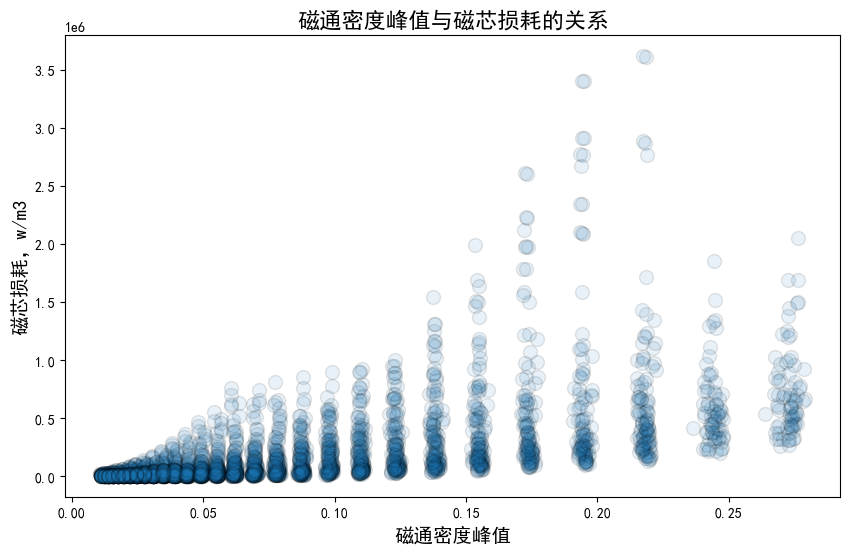

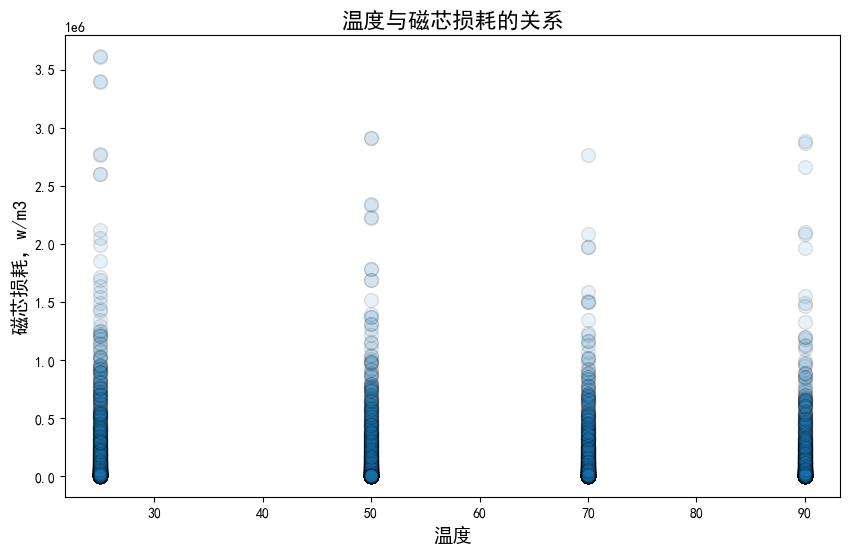

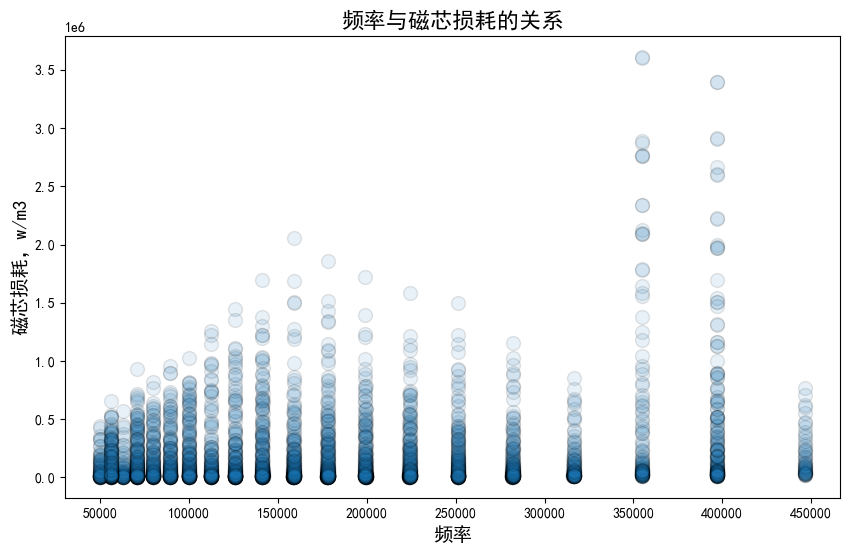

In [5]:
f_data = data['频率，Hz'].tolist()
Bm_data = data[col].max(axis=1).tolist()
P_data = data['磁芯损耗，w/m3'].tolist()
T_data = data['温度，oC'].tolist()
# 创建散点图
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Bm_data, P_data, cmap='viridis', s=100, edgecolor='k', alpha=0.1)
# 添加标题和标签
plt.title("磁通密度峰值与磁芯损耗的关系", fontsize=16)
plt.xlabel("磁通密度峰值", fontsize=14)
plt.ylabel("磁芯损耗，w/m3", fontsize=14)
plt.savefig(f'问题2\\磁通密度峰值与磁芯损耗的关系.png',dpi=500)

# 显示图表
plt.show()

plt.figure(figsize=(10, 6))
scatter = plt.scatter(T_data, P_data, cmap='viridis', s=100, edgecolor='k', alpha=0.1)
# 添加标题和标签
plt.title("温度与磁芯损耗的关系", fontsize=16)
plt.xlabel("温度", fontsize=14)
plt.ylabel("磁芯损耗，w/m3", fontsize=14)
plt.savefig(f'问题2\\温度与磁芯损耗的关系.png',dpi=500)

# 显示图表
plt.show()

plt.figure(figsize=(10, 6))
scatter = plt.scatter(f_data, P_data, cmap='viridis', s=100, edgecolor='k', alpha=0.1)
# 添加标题和标签
plt.title("频率与磁芯损耗的关系", fontsize=16)
plt.xlabel("频率", fontsize=14)
plt.ylabel("磁芯损耗，w/m3", fontsize=14)
plt.savefig(f'问题2\\频率与磁芯损耗的关系.png',dpi=500)
# 显示图表
plt.show()

#### 除了磁通密度峰值与磁芯损耗的关系呈现出明显的幂函数关系之外，温度和频率都看不到具体的影响关系，所以我们考虑单独拟合模型来进行考察


   对于不同类型的函数关系，可以尝试拟合不同的模型，并比较其拟合效果（例如通过 R² 值或残差来评估）。

   常见的拟合模型：
   - **线性关系**：$ Y = aX + b $
   - **次方关系**：$ Y = aX^2 + bX + c $
   - **对数关系**：$ Y = a \log(X) + b $
   - **幂函数关系**：$ Y = aX^b $

   通过拟合这些模型后，比较它们的拟合效果，选择最优模型。


In [6]:
# 假设我们有一些已测量的数据
f_data = data['频率，Hz'].values
Bm_data = data[col].max(axis=1).values
P_data = data['磁芯损耗，w/m3'].values
T_data = data['温度，oC'].values

In [7]:
# 定义斯坦麦茨方程模型
def f(params, X):
    a, b = params
    return a*X+b

# 定义目标函数：平方误差
def objective(params, X,P):
    P_pred = f(params, X)
    return np.sum((P_pred - P)**2)

# 初始猜测的参数值
initial_guess = [0,0]
# 约束条件
bounds = [(None, None), (None, None)]  
# 使用SLSQP进行优化
result = minimize(objective, initial_guess, args=(T_data, P_data), bounds=bounds, method='L-BFGS-B')

# 输出优化结果
a, b = result.x
print("线性方程结果")
print(f"a: {a}, b: {b}")
print("优化后的目标函数:",result.fun/1000000000000)

线性方程结果
a: -1210.2776500973482, b: 251253.94637970612
优化后的目标函数: 389.06015565786214


In [8]:
def f(params, X):
    a, b = params
    return a*np.log(X)+b

# 定义目标函数：平方误差
def objective(params, X,P):
    P_pred = f(params, X)
    return np.sum((P_pred - P)**2)

# 初始猜测的参数值
initial_guess = [0,0]
# 约束条件
bounds = [(None, None), (None, None)]   
# 使用SLSQP进行优化
result = minimize(objective, initial_guess, args=(T_data, P_data), bounds=bounds, method='L-BFGS-B')

# 输出优化结果
a, b = result.x
print("对数关系")
print(f"a: {a}, b: {b}")
print("优化后的目标函数:",result.fun/1000000000000)

对数关系
a: -67850.11001570047, b: 448851.6339514291
优化后的目标函数: 388.90885576882937


In [9]:
def f(params, X):
    a, b = params
    return a*(X**b)

# 定义目标函数：平方误差
def objective(params, X,P):
    P_pred = f(params, X)
    return np.sum((P_pred - P)**2)

# 初始猜测的参数值
initial_guess = [0,0]
# 约束条件
bounds = [(None, None), (None, None)]   
# 使用SLSQP进行优化
result = minimize(objective, initial_guess, args=(T_data, P_data), bounds=bounds, method='L-BFGS-B')

# 输出优化结果
a, b = result.x
print("对数关系")
print(f"a: {a}, b: {b}")
print("优化后的目标函数:",result.fun/1000000000000)

对数关系
a: 473606.200608278, b: -0.2511609978149597
优化后的目标函数: 389.0977702602562


#### 可以看到，对数关系是效果最好的，因为误差最小

#### 因此，我们将温度这一项，使用对数函数作为乘项，加入到斯坦麦茨方程中

$P=k_1•f^{\alpha_1}•B_m^{\beta_1}•log(T)^{\gamma_1}$

In [10]:
# 假设我们有一些已测量的数据
f_data = data['频率，Hz'].values
Bm_data = data[col].max(axis=1).values
P_data = data['磁芯损耗，w/m3'].values
T_data = data['温度，oC'].values

In [11]:
import numpy as np
from scipy.optimize import minimize
 

# 改进的方程
def steinmetz_eq_adjust(params, f, Bm, T):
    k1, alpha1, beta1, gamma1 = params
    return k1 * f**alpha1 * Bm**beta1 * np.log(T)**gamma1

# 定义目标函数：平方误差
def objective_adjust(params, f, Bm, P, T):
    P_pred = steinmetz_eq_adjust(params, f, Bm, T)
    return np.sum((P_pred - P)**2)

# 初始猜测的参数值
initial_guess = [1.08, 1.4, 2.1,0]

# 约束条件
bounds = [(0, None), (1, 3), (2, 3),(None,None)]  # k1 > 0, 1 < alpha1 < 3, 2 < beta1 < 3

# 使用SLSQP进行优化
result = minimize(objective_adjust, initial_guess, args=(f_data, Bm_data, P_data,T_data), bounds=bounds, method='L-BFGS-B')

# 输出优化结果
k1_adj_opt, alpha1_adj_opt, beta1_adj_opt, gamma1_adj_opt = result.x
print("优化后的系数:")
print(f"k1: {k1_adj_opt}, alpha1: {alpha1_adj_opt}, beta1: {beta1_adj_opt}, gamma1:{gamma1_adj_opt}")
print("优化后的目标函数:",result.fun/1000000000000)


优化后的系数:
k1: 6.2674580380827605, alpha1: 1.3849400132955234, beta1: 2.050299441530465, gamma1:-1.0965192248311522
优化后的目标函数: 14.42588628981622


### 可以看到，在加入温度后，目标函数有了显著的提升，为了更加系统的度量这种差别，我们分别计算两种公式的MSE\RMSE\MAE\R2

In [13]:
# 假设我们有一些已测量的数据
f_data = data['频率，Hz'].values
Bm_data = data[col].max(axis=1).values
P_data = data['磁芯损耗，w/m3'].values
T_data = data['温度，oC'].values

data['斯坦麦茨方程'] = [steinmetz_eq([k1_ste_opt,alpha1_ste_opt,beta1_ste_opt],f,Bm) for f,Bm in zip(f_data,Bm_data)]
data['调整后斯坦麦茨方程'] = [steinmetz_eq_adjust([k1_adj_opt, alpha1_adj_opt, beta1_adj_opt, gamma1_adj_opt],f,Bm,T) for f,Bm,T in zip(f_data,Bm_data,T_data)]

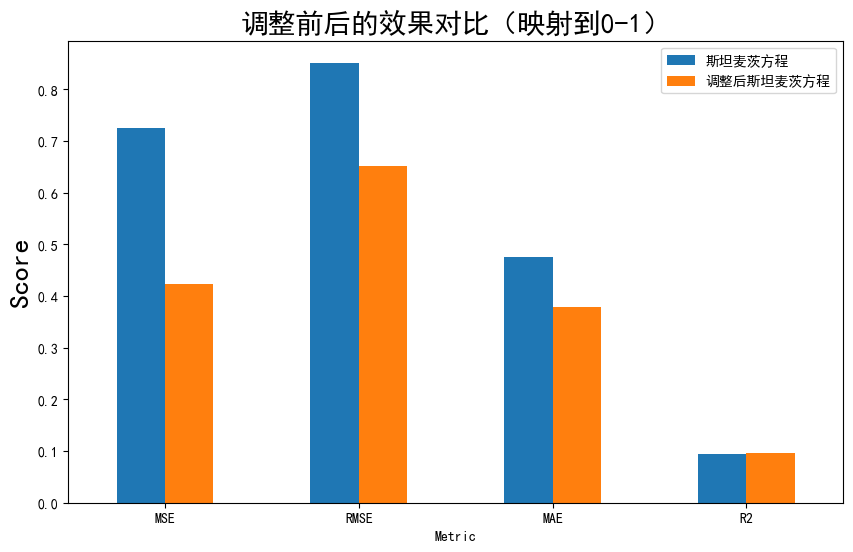

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_true = data['磁芯损耗，w/m3'].values
y_pred_model1 = data['斯坦麦茨方程'].values
y_pred_model2 = data['调整后斯坦麦茨方程'].values
# 定义评价指标
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# 计算模型1和模型2的评价指标
metrics_model1 = evaluate_model(y_true, y_pred_model1)
metrics_model2 = evaluate_model(y_true, y_pred_model2)

# 创建DataFrame保存结果
df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
    '斯坦麦茨方程': metrics_model1,
    '调整后斯坦麦茨方程': metrics_model2
})

df.to_excel('问题2\\对比结果.xlsx')


df_guiyi = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
    '斯坦麦茨方程': [i/(10**len(str(int(i)))) for i in metrics_model1],
    '调整后斯坦麦茨方程': [i/(10**len(str(int(i)))) for i in metrics_model2]
})
# 可视化：分组直方图
df_guiyi.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('调整前后的效果对比（映射到0-1）',fontsize = 20)
plt.ylabel('Score',fontsize = 20)
plt.xticks(rotation=0)
plt.savefig(f'问题2\\调整前后的效果对比（映射到0-1）.png',dpi=500)
plt.show()
